#    
# Single-game skill rating predictor for chess: project results

Tyler Mark Ahlstrom
<br>
April 2018 - March 2019
#   

## Overview

I developed a model to predict the skill (Elo) of a chess player based on their performance in a single game of chess. The motivation for this model is that the standard Elo system only considers the *result* of the game, but not *how* the game is played. In a single game of chess there is only one win and loss, but there are dozens of decisions of various merit. My model leverages this information to generate a strong estimate of player skill much more quickly than the standard Elo system is able to do.

The model was trained using 40 engineered features based on the positional and mate evaluations of the Stockfish chess engine. A ridge model was used in order to prevent overfitting my data, which contained 30k performances. 

All code can be found in the corresponding folders. Sample data is available in the data folder. 

To see more about the problem being addressed and details about my methodology, see the [proposal and update notebook](Project_Proposal.ipynb).

<br />

## Analyzed performances

To analyze the performance of a player in an single game of chess, I ran the game through a local implementation of the Stockfish chess engine. At each point in the game, I used the engine to evaluate the merit of *each* move option available during each turn of the game. Using this information, I could then rank the move a player chose on their turns.

See [here](code\performance_evaluator.py) for my performance evaluation code. 

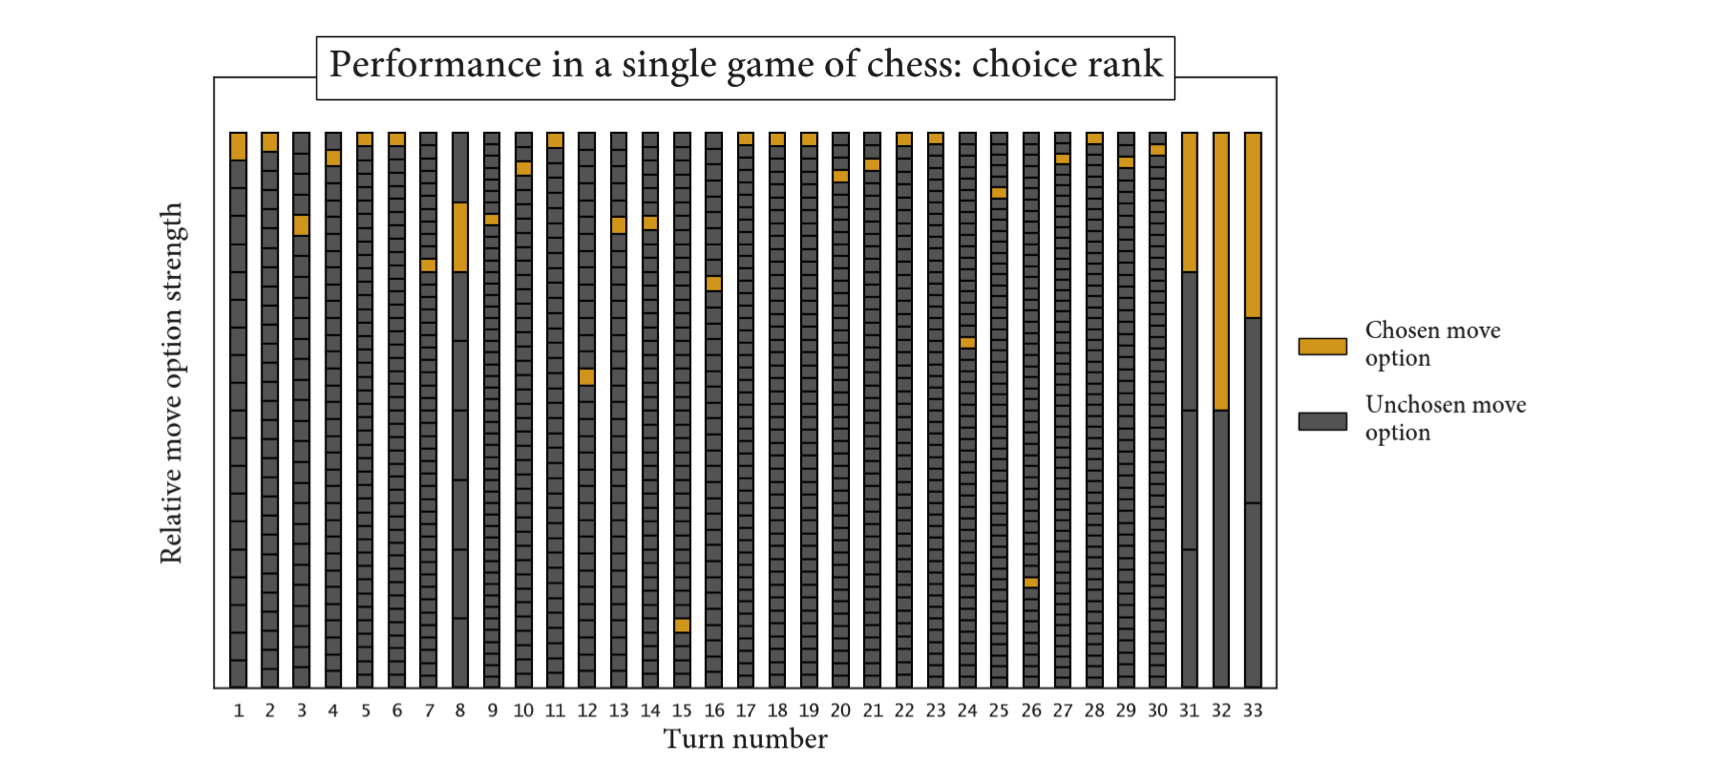

In [21]:
from IPython.display import Image, display
display(Image(filename='images/performance_choice_rank.png', embed=True))

Above you can see the performance of a single player in a single game of chess. For each turn in the game (x-axis), their move options were ranked (y-axis) and the move the player chose is highlighted in yellow. For example, in the above performance, the on the player's third turn they chose the 5th best option, and apparently blundered on their 15th turn.


<br />

Besides the move ranks, I also wanted to incorporate the engine's absolute evaluation of each move option. Below you can see these evaluations for the same performance as above, and where the color reflects the (absolute) strength of the move option.

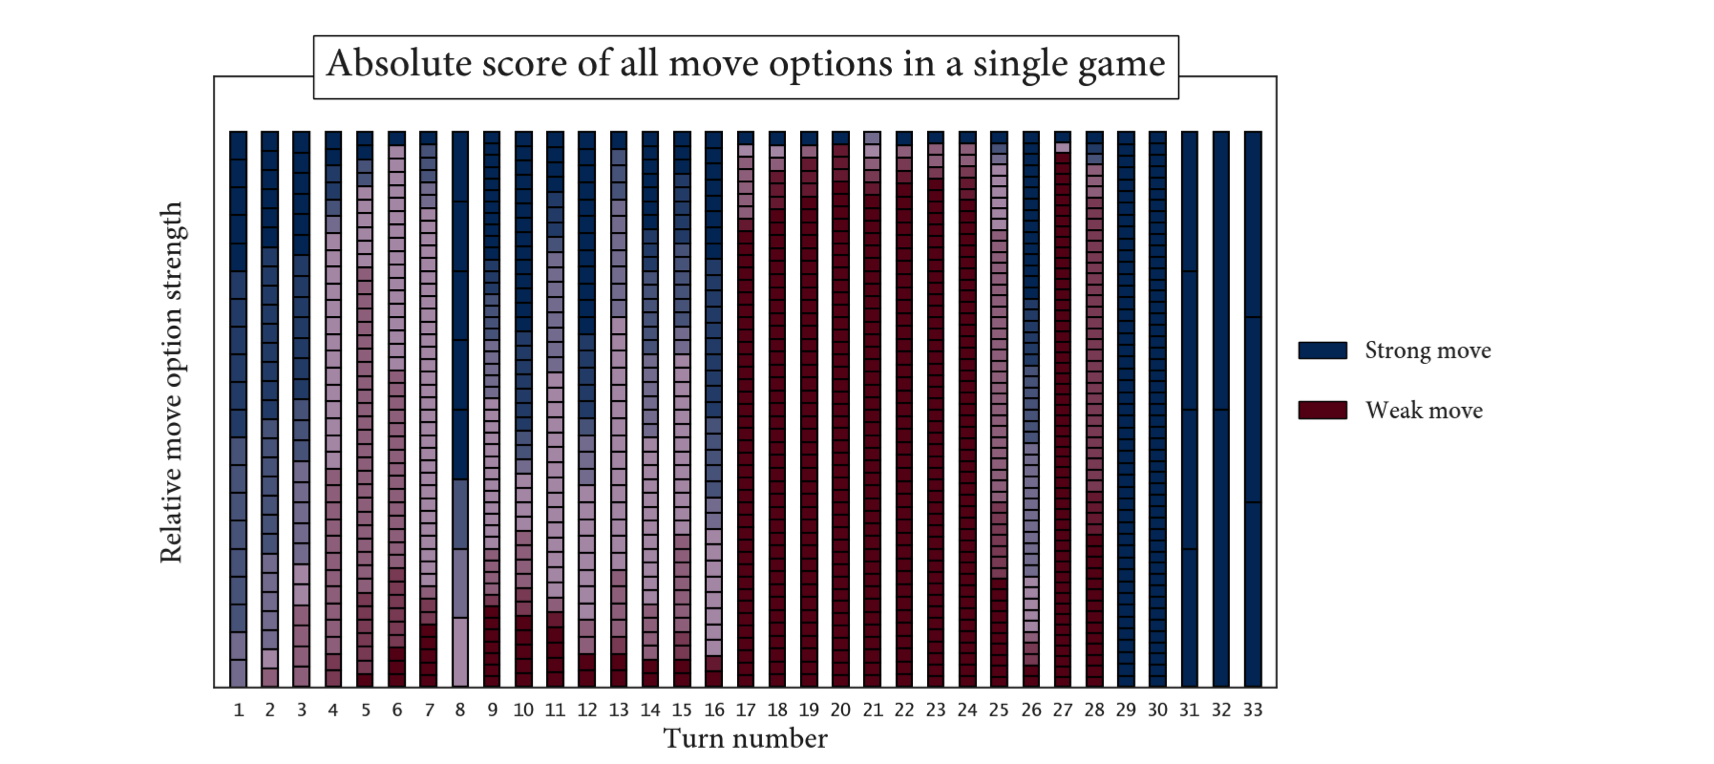

In [22]:
display(Image(filename='images/performance_absolute_options.png', embed=True))

The above analysis allows for a more nuanced characterization of a player's performance. For example, in this case it reveals that the player faced a very precarious mid-late game (turns 17-24) where only one or two good options were available to them, and the rest were quite bad. 

<br />

I analyzed 15k games (30k performances) in this manner. Using both the move rank and absolute engine evaluations, I then engineered features that would be used to train my model.

## Engineered features

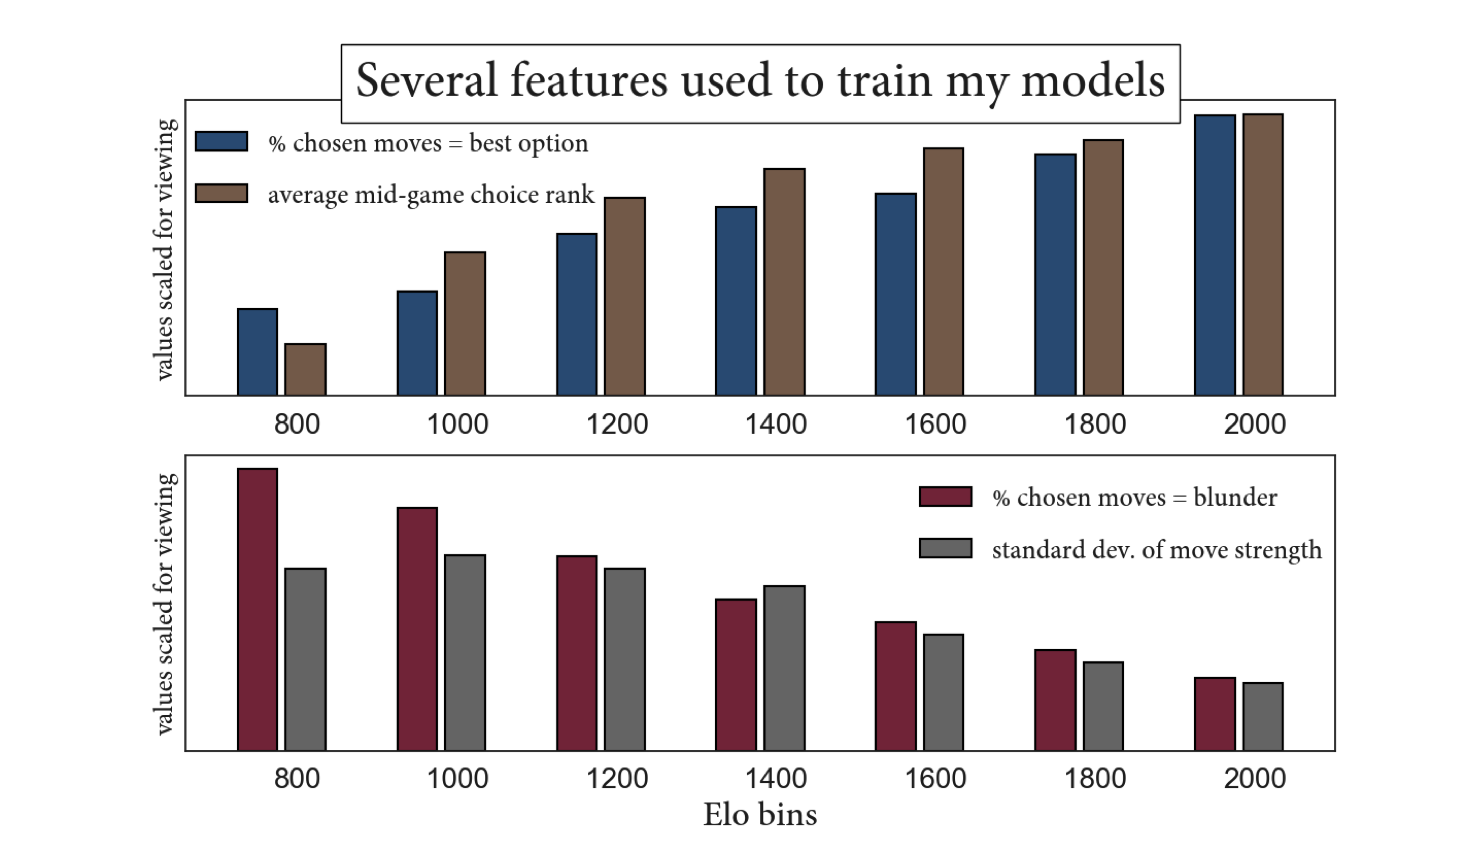

In [23]:
display(Image(filename='images/features_updated.png', embed=True))

After performances were evaluated, features were engineered from this data. Above you can see some of the more intuitive features, which correlate with player skill in the manner one would expect. 40 features in total were engineered. Besides those shown above, I made use of the players move strength compared to the expected absolute merit of a random move at different points in the game, the number and timing of 'rank blunders', and many others. See [this notebook](code\feature_engineering_and_model_exploration.ipynb) for details.

## Model performance

Several different model architectures were explored before and after feature engineering, including basic neural networks and recurrent neural networks (the later being appealing since games are variable length). However, these showed no significant gains over simple regularized linear models and were prone to overfitting. A ridge model was ultimately selected. 

<br />

My model was able to achieve an out of sample r<sup>2</sup> of .37. I suspect with sufficiently more data, allowing for a more complex architecture, this value would improve. However, this may not be so. Two considerations:

<br />

- <strong>Performance variability</strong>. Performances in individual games surely varies, putting a cap on any models ability to predict Elo based on a performance in a single game. (Characterizing the performance variability of different players is an interesting project on its own.) To address this point, my model was compared to how the standard Elo system would have done on the same data (see below).

<br />
- <strong>Separating an individual's performance from the strength of their opponent</strong>. A central goal of this project was to create a model capable of quickly estimating the skill of a player in order to improve matchmaking for newer accounts. To accomplish this, my model would have to perform well when the matchups are bad, and as such, I did my best throughout to *isolate* the two performances that occur in an individual game. That is to say, when my model looks at a performance and is asked to estimate the skill of the player, the model *does not* receive any explicit information about the opponent. This is to prevent data leakage that would otherwise result due to the fact that my raw data comes from games where the matchup is generally good (similar Elo). However, it is quite reasonable to assume that a strong opponent would make a players performance appear weaker, e.g. by giving them fewer or harder to spot strong options. 


<br />
To compare my model's performance to the standard Elo system, I retroactively determined how the standard system would have performed based on the same data. For the purposes of these calculations, I did allow the Elo model to see the true skill (Elo) of the opponent. I also charitably allowed for an optimized [K-factor](https://en.wikipedia.org/wiki/Elo_rating_system#Most_accurate_K-factor) and set the default rating to be the average of the training set.

<br />
My model(r<sup>2</sup> = .37) showed an  <strong>85% improvement</strong>  over the standard Elo system(r<sup>2</sup> = .20).


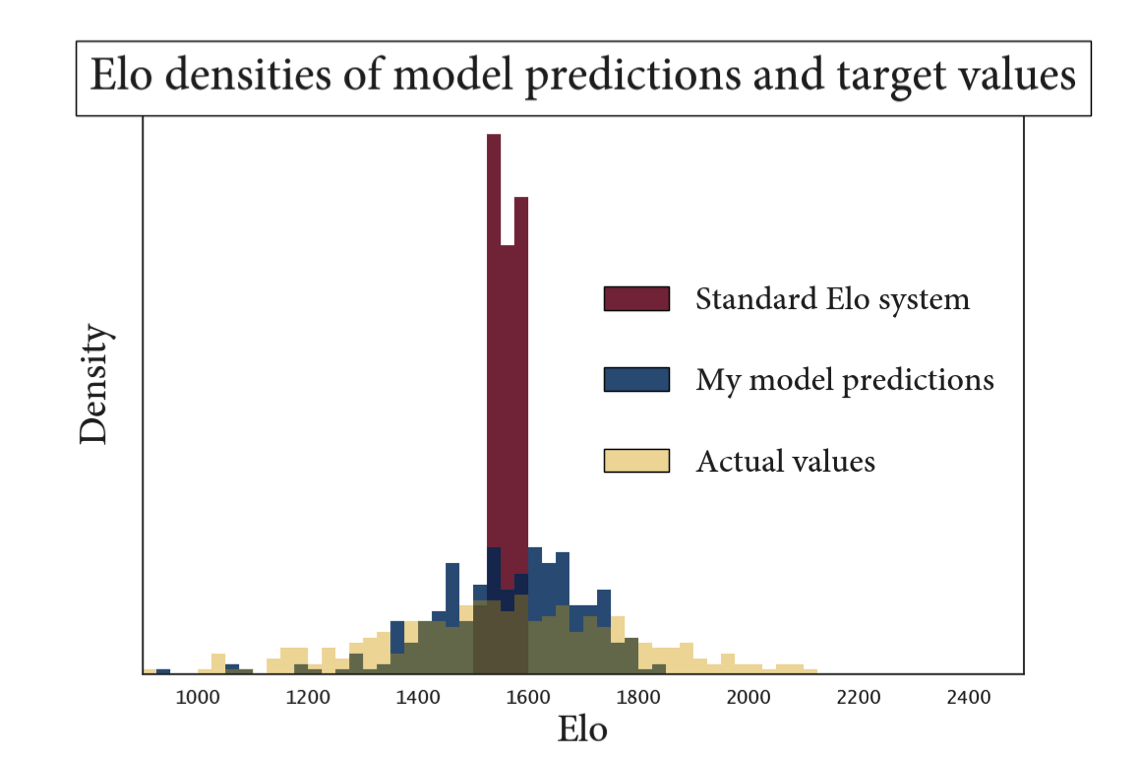

In [24]:
display(Image(filename='images/model_predictions_distribution.png', embed=True))

Lastly, I also explored how the densities of my model predictions compared to those of the standard Elo system. As expected, my model was more willing to go out on a limb for performances it thought were particularly strong or (apparently especially) particularly weak. 

## Future directions

To improve my model performance, two routes are promising:
<p>
1. Get enough data to (hopefully) allow for a more complex model architecture. A recurrent neural network would be particularly desirable as it would be able to handle games of variable length without having to rely on engineered features. 
</p>
<p>
2. Get more data from games with a poor matchup. This would mitigate the problem of imperfect isolation of the individual performances in a game (see second problem above). 
</p>


<br>
## Sources and notable resources:

chess.com leaderboards (used for scraping, see project proposal notebook): https://www.chess.com/leaderboard/live/rapid

lichess.com database (used for collecting raw game data): https://database.lichess.org/

Stockfish engine (used for processing raw game data in Python): https://pypi.org/project/stockfish/
